**Short-Term Stock Price Prediction Using Regression Models**

Stock market prices fluctuate daily due to various economic and market factors. Accurately predicting the next day’s closing stock price is challenging but essential for investors and analysts. Traditional manual analysis is time-consuming and may overlook hidden patterns in historical data. Therefore, a data-driven approach is needed to analyze historical stock prices and predict short-term future values.

The objective of this task is to use historical stock market data to predict the next day’s closing price of a selected stock using regression techniques. The model aims to learn the relationship between opening price, highest price, lowest price, trading volume, and the closing price.

Tools Used

Google Colab – Cloud-based Python execution environment

Python – Programming language

yfinance – To fetch historical stock data from Yahoo Finance

Pandas & NumPy – Data manipulation and numerical computations

Scikit-learn – Regression model implementation

Matplotlib – Visualization of actual vs predicted prices

Plan for the Task

Select a stock (e.g., Apple Inc.)

Fetch historical stock data using the yfinance library

Preprocess the data and select relevant features

Create a target variable by shifting the closing price to the next day

Split the data into training and testing sets

Train a Linear Regression model on historical data

Predict the next day’s closing prices

Evaluate model performance using error metrics

Plot actual versus predicted closing prices for comparison

In [1]:
!pip install yfinance #to install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Choose stock (Apple)
stock_symbol = "AAPL"

# Download historical data
data = yf.download(stock_symbol, start="2019-01-01", end="2024-01-01")

# Show data
data.head()


/tmp/ipython-input-2918139756.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2019-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.538826,37.759896,36.661683,36.818571,148158800
2019-01-03,33.799671,34.638779,33.754506,34.225167,365248800
2019-01-04,35.242561,35.311499,34.182386,34.355912,234428400
2019-01-07,35.164104,35.378044,34.681558,35.347140,219111200
2019-01-08,35.834450,36.088799,35.304362,35.551577,164101200


In [4]:
# Input features
X = data[['Open', 'High', 'Low', 'Volume']]

# Target: next day's close price
y = data['Close'].shift(-1)

# Remove last row (NaN target)
X = X[:-1]
y = y[:-1]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [7]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 5.422728893035027
R² Score: 0.9825884314251493


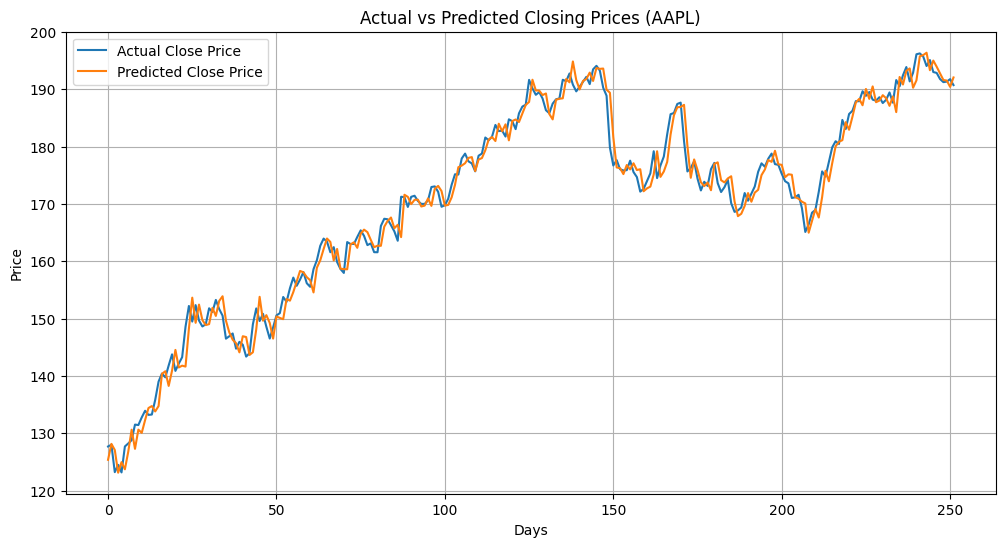

In [8]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title("Actual vs Predicted Closing Prices (AAPL)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [9]:
# Use last available day data
last_day = X.iloc[-1].values.reshape(1, -1)

tomorrow_price = model.predict(last_day)
print("Predicted Next Day Closing Price:", tomorrow_price[0])


Predicted Next Day Closing Price: [192.06343434]
